# FLU-SHOT-LEARNING-PREDICT-H1N1-AND-SEASONAL-FLU-VACCINES

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [4]:
import io
%cd "C:\Users\harik\Downloads\ML Projects"

C:\Users\harik\Downloads\ML Projects


# Importing the dataset

In [5]:
trainingset=pd.read_csv("trainingset.csv")

In [6]:
testset=pd.read_csv("testset.csv")

In [7]:
trainingsetlabels=pd.read_csv("trainingsetlabels.csv")

In [8]:
print(trainingset.shape)
print(testset.shape)
print(trainingsetlabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [9]:
# Algorithm based missing value impuatation - considers the impact of other variables on the missing value and impute 
# accordingly
# MICE - multivariate imputation using chained equatations is the most popular algorithm
# Imputes both numeric and non numeric object/categrical missing values
# Intitially imputed with mean, median or mode and chained equatations are built
# chained Equatations wherein the missing value column/variable is treated
# as dependent variable and revelent classification/regression model is built and prediction done
# missing value will be replaced with predicted value.

In [10]:
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

# concating both dataframes for preprocessing

In [12]:
# combine both dataframes for preprocessing
combinedf=pd.concat([trainingset,testset],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [14]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [15]:
# for using Iterative Imputer in sklearn which is experimental as of now
# 1) remove variables or columns not needed
# 2) Lableencode all object and categorical data but retation the missing values as it is

In [16]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


# Encoding Data

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
original=combinedf

In [19]:
mask=combinedf.isnull()

In [20]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [21]:
combinedf=combinedf.where(~mask,original)

In [22]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


# Imputing Data Models

In [23]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeClassifier

In [24]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=20)

In [25]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\harik\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [27]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<Axes: >

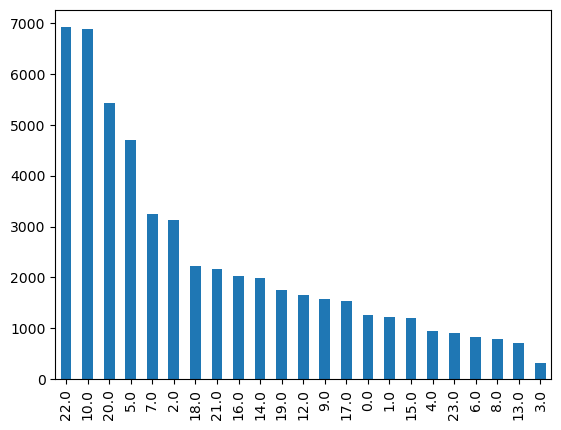

In [28]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')

In [29]:
# split Data
flu_train=combinedf_impute.loc[0:26706]

In [30]:
flu_test=combinedf_impute.loc[26707:53414]

In [31]:
print(flu_train.shape)
print(trainingset.shape)
print(flu_test.shape)
print(testset.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


# Spliting Data

In [32]:
y=trainingsetlabels.seasonal_vaccine
x=flu_train

<Axes: >

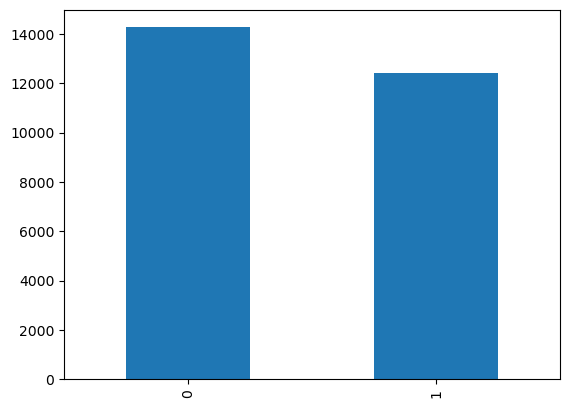

In [33]:
y.value_counts().plot(kind="bar")

In [34]:
# build the following  -- score, predict, classification report,ROC curve
# binary Logistic Regression
# Decision Tree
# Random Forest
# Gradient boosting
# Naive Bayes
# Support Vector Machine

# Accuracy (Linear Regression for both H1N1 and seasonal flu)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
y=LabelEncoder().fit_transform(y)

In [37]:
logit=LogisticRegression(max_iter=1000)

In [38]:
logitmodel=logit.fit(x,y)

In [39]:
logitmodel.score(x,y)

0.7723443292020818

In [40]:
logitpredict=logitmodel.predict(x)

In [41]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,11505,2767
1,3313,9122


In [42]:
from sklearn.metrics import classification_report, RocCurveDisplay

In [43]:
print(classification_report(y,logitmodel.predict(x)))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
np.mean(cross_val_score(logit,x,y))

0.7713709721795696

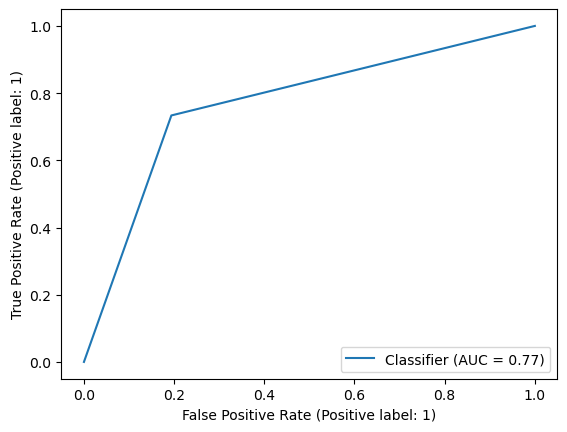

In [46]:
RocCurveDisplay.from_predictions(y,logitmodel.predict(x))

# DecisionTree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier(max_depth=10)

In [49]:
dt_model=dt.fit(x,y)

In [50]:
dt_model.score(x,y)

0.8155914179803048

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cross_val_score(dt,x,y)

array([0.740921  , 0.74391614, 0.74686388, 0.7457405 , 0.74311927])

In [53]:
np.mean([0.74616249, 0.74503931, 0.74742558, 0.74667665, 0.74461711])

0.745984228

In [54]:
treepredict=dt_model.predict(x)

In [55]:
pd.crosstab(y,dt_model)

col_0,DecisionTreeClassifier(max_depth=10)
row_0,
0,14272
1,12435


In [56]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     14272
           1       0.80      0.81      0.80     12435

    accuracy                           0.82     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.82      0.82      0.82     26707



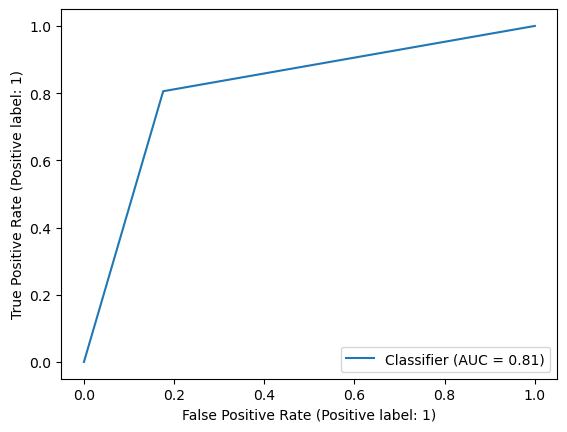

In [57]:
RocCurveDisplay.from_predictions(y,dt_model.predict(x))

# RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=2)

In [60]:
rf_model=rf.fit(x,y)

In [61]:
rf_model.score(x,y)

0.739543939791066

In [62]:
cross_val_score(rf,x,y)

array([0.73118682, 0.74241857, 0.74255757, 0.72888972, 0.74049803])

In [63]:
np.mean([0.73567952, 0.73998502, 0.74293204, 0.73843849, 0.7403108 ])

0.739469174

In [64]:
rfpredict=rf_model.predict(x)

In [65]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     14272
           1       0.78      0.62      0.69     12435

    accuracy                           0.74     26707
   macro avg       0.75      0.73      0.73     26707
weighted avg       0.75      0.74      0.74     26707



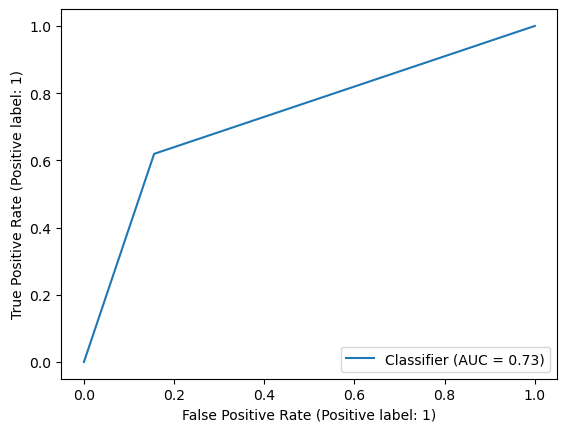

In [66]:
RocCurveDisplay.from_predictions(y,rf_model.predict(x))

# GradientBoosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [69]:
gbmmodel=gbm.fit(x,y)

In [70]:
gbmmodel.score(x,y)

0.8136818062680197

In [71]:
gbmpredict=gbmmodel.predict(x)

In [72]:
pd.crosstab(y,gbmpredict)

col_0,0,1
row_0,,
0,11879,2393
1,2583,9852


In [73]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     14272
           1       0.80      0.79      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



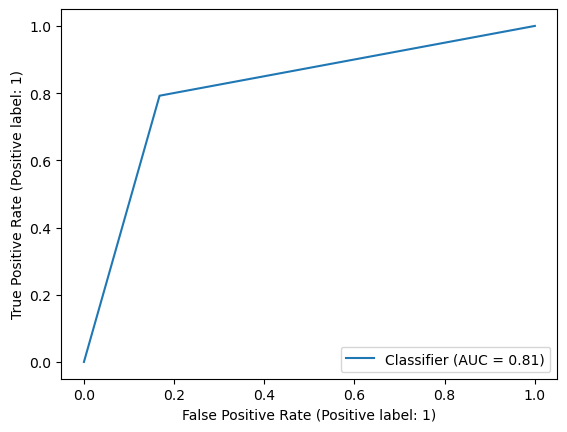

In [74]:
RocCurveDisplay.from_predictions(y,gbmpredict)

# Naive Bayes

In [75]:
from sklearn.naive_bayes import CategoricalNB

In [76]:
nb=CategoricalNB()

In [77]:
nb_model=nb.fit(x,y)

In [78]:
nb_model.score(x,y)

0.7554199273598682

In [79]:
np.mean(cross_val_score(nb,x,y))

0.7536600968567437

In [80]:
print(classification_report(y,nb_model.predict(x)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.74      0.74      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.76      0.76      0.76     26707



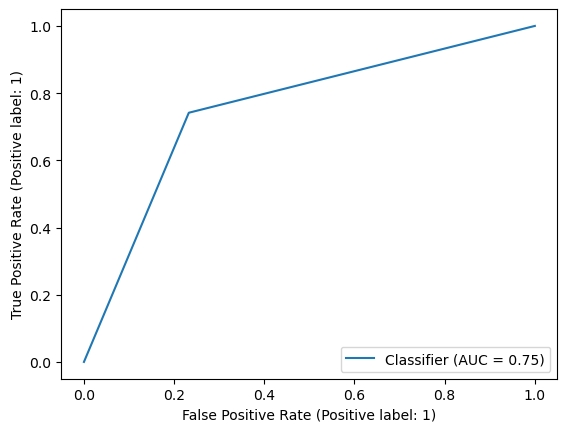

In [81]:
RocCurveDisplay.from_predictions(y,nb_model.predict(x))

# SVM

In [82]:
from sklearn.svm import SVC

In [83]:
clf=SVC()

In [84]:
clfmodel=clf.fit(x,y)

In [85]:
clfmodel.score(x,y)

0.7783727112741978

# Grid search is a method for performing hyper-parameter optimisation,that is with a given model

# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
knn=KNeighborsClassifier()

In [88]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [89]:
grid_search=grid.fit(x,y)

In [90]:
grid_search.score(x,y)

0.7601752349571274

In [91]:
grid_search.best_params_

{'n_neighbors': 24}

In [92]:
grid_search.best_score_

0.7322051358610869

In [93]:
print(classification_report(y,grid_search.predict(x)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     14272
           1       0.76      0.71      0.73     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



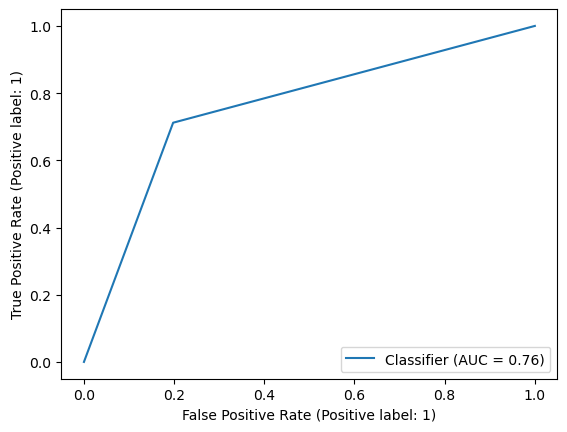

In [94]:
RocCurveDisplay.from_predictions(y,grid_search.predict(x))

In [95]:
!pip install imblearn

In [96]:
from imblearn.under_sampling import RandomUnderSampler

In [97]:
rus=RandomUnderSampler(random_state=42)

In [98]:
x_rus,y_rus=rus.fit_resample(x,y)

In [99]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_rus).value_counts())

0    14272
1    12435
dtype: int64
0    12435
1    12435
dtype: int64


In [100]:
logit_rus=LogisticRegression(max_iter=1000)

In [101]:
logit_rus_model=logit_rus.fit(x_rus,y_rus)

In [102]:
logit_rus_model.score(x_rus,y_rus)

0.7699236027342179

In [103]:
logit_rus_pred=logit_rus_model.predict(x_rus)

In [104]:
print(classification_report(y_rus,logit_rus_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     12435
           1       0.77      0.76      0.77     12435

    accuracy                           0.77     24870
   macro avg       0.77      0.77      0.77     24870
weighted avg       0.77      0.77      0.77     24870



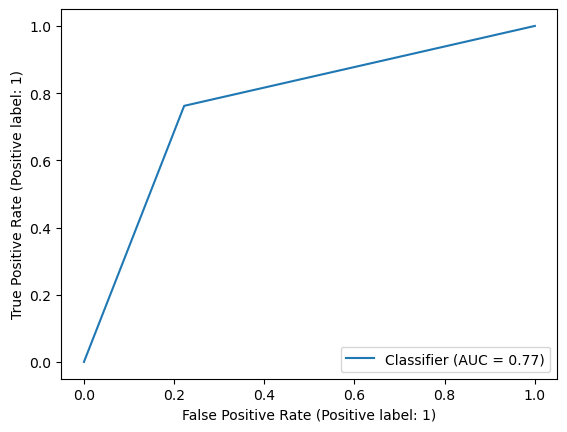

In [105]:
RocCurveDisplay.from_predictions(y_rus,logit_rus_pred)

In [106]:
from imblearn.over_sampling import RandomOverSampler

In [107]:
ros=RandomOverSampler(random_state=42)

In [108]:
x_ros,y_ros=ros.fit_resample(x,y)

In [109]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

0    14272
1    12435
dtype: int64
0    14272
1    14272
dtype: int64


In [110]:
logit_ros=LogisticRegression(max_iter=1000)

In [111]:
logit_ros_model=logit_ros.fit(x_ros,y_ros)

In [112]:
logit_ros_model.score(x_ros,y_ros)

0.7720361547085202

In [113]:
logit_ros_pred=logit_ros_model.predict(x_ros)

In [114]:
print(classification_report(y_ros,logit_ros_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     14272
           1       0.78      0.76      0.77     14272

    accuracy                           0.77     28544
   macro avg       0.77      0.77      0.77     28544
weighted avg       0.77      0.77      0.77     28544



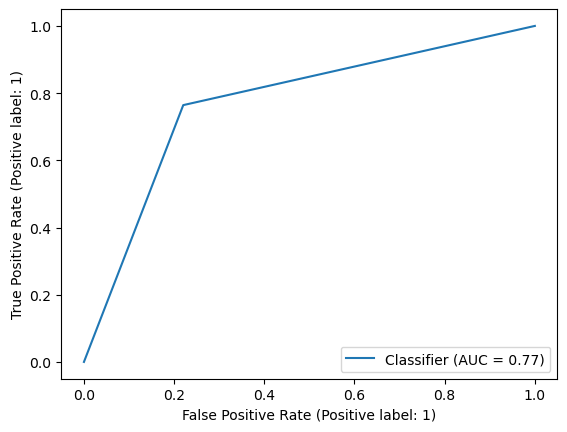

In [115]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_pred)